# **Part 1: Data Processing and Feature Engineering (Day 1)**

# **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Data Cleaning**
- Load the dataset using Pandas.
- Handle missing values in oil prices by filling gaps with interpolation.**
- Convert date columns to proper datetime formats.
- Merge data from stores.csv, oil.csv, and holidays_events.csv into the main dataset.**

In [2]:
# Load datasets
train = pd.read_csv('train.csv', parse_dates=['date'])
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv', parse_dates=['date'])
holidays_events = pd.read_csv('holidays_events.csv', parse_dates=['date'])

In [3]:
# Handle missing values in oil prices using interpolation
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='linear')

In [4]:
# Merge datasets
train = train.merge(stores, on='store_nbr', how='left')
train = train.merge(oil, on='date', how='left')
train = train.merge(holidays_events, on='date', how='left')

In [5]:
# Convert date columns to datetime format
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

# **2. Feature Engineering**

- **Time-based Features:**
  - Extract day, week, month, year, and day of the week.
  - Identify seasonal trends (e.g., are sales higher in December?).
   
- **Event-based Features:**
  - Create binary flags for holidays, promotions, and economic events.
  - Identify if a day is a government payday (15th and last day of the month).
  - Consider earthquake impact (April 16, 2016) as a separate feature.
    
- **Rolling Statistics:**
  - Compute moving averages and rolling standard deviations for past sales.
  - Include lagged features (e.g., sales from the previous week, previous month).

- **Store-Specific Aggregations:**
  - Compute average sales per store type.
  - Identify top-selling product families per cluster.   

In [6]:
# Feature Engineering
train['day'] = train['date'].dt.day
train['week'] = train['date'].dt.isocalendar().week
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['day_of_week'] = train['date'].dt.dayofweek

In [7]:
# Holiday & Event Features
train['is_holiday'] = train['type_y'].notna().astype(int)
train['is_weekend'] = (train['day_of_week'] >= 5).astype(int)
train['is_gov_payday'] = train.apply(
    lambda row: int(row['day'] in [15, row['date'].days_in_month]), axis=1
)
train['earthquake_impact'] = (train['date'] == '2016-04-16').astype(int)

In [8]:
# Rolling Statistics & Lag Features
train['sales_lag_7'] = train.groupby(['store_nbr', 'family'])['sales'].shift(7)
train['sales_lag_30'] = train.groupby(['store_nbr', 'family'])['sales'].shift(30)
train['rolling_mean_7'] = train.groupby(['store_nbr', 'family'])['sales'].rolling(7).mean().reset_index(level=[0,1], drop=True)
train['rolling_std_7'] = train.groupby(['store_nbr', 'family'])['sales'].rolling(7).std().reset_index(level=[0,1], drop=True)

In [9]:
# Store-Specific Aggregations
store_avg_sales = train.groupby('store_nbr')['sales'].mean().rename('avg_store_sales')
train = train.merge(store_avg_sales, on='store_nbr', how='left')

# **3. Exploratory Data Analysis (EDA)**

- Visualize sales trends over time.
- Analyze sales before and after holidays and promotions.
- Check correlations between oil prices and sales trends.
- Identify anomalies in the data. 

Visualizing sales trends over time


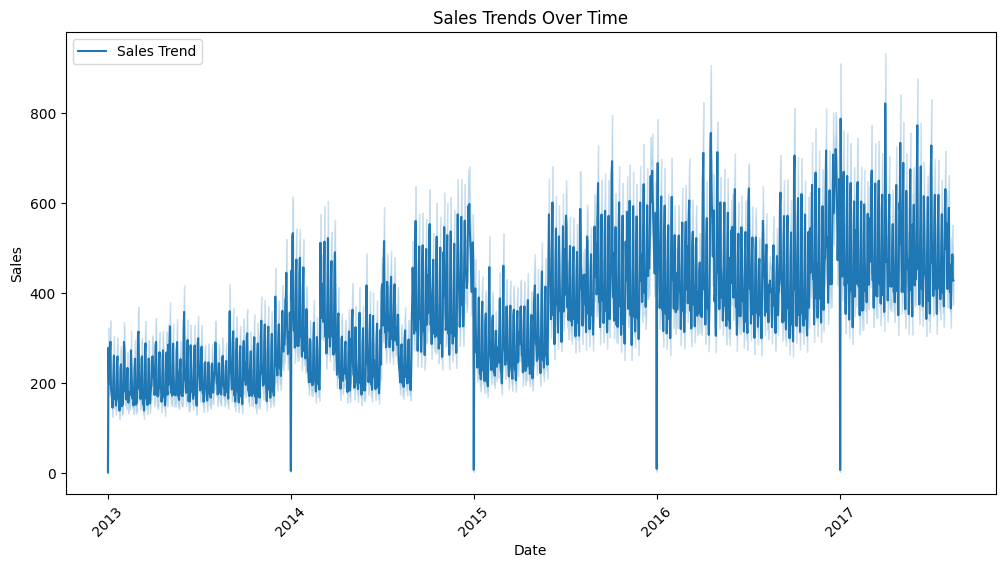

In [10]:
# Exploratory Data Analysis (EDA)
print("Visualizing sales trends over time")
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=train, label='Sales Trend')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Analyzing sales before and after holidays and promotions


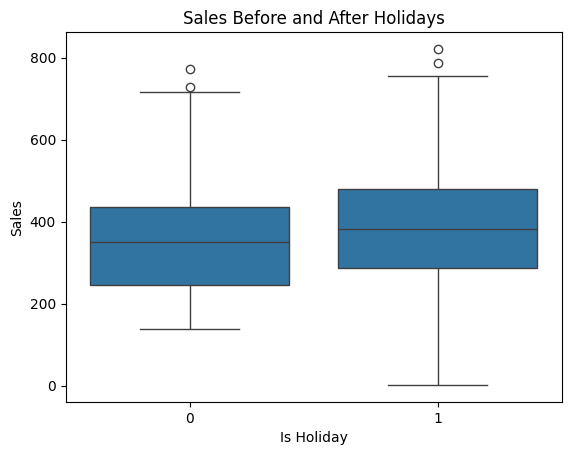

In [11]:
# Analyze Pre/Post-Holiday and Promotion Sales
print("Analyzing sales before and after holidays and promotions")
holiday_sales = train.groupby(['date', 'is_holiday'])['sales'].mean().reset_index()
sns.boxplot(x='is_holiday', y='sales', data=holiday_sales)
plt.title('Sales Before and After Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Sales')
plt.show()

Checking correlations between oil prices and sales trends
Correlation between Sales and Oil Prices:
               sales  dcoilwtico
sales       1.000000   -0.079009
dcoilwtico -0.079009    1.000000


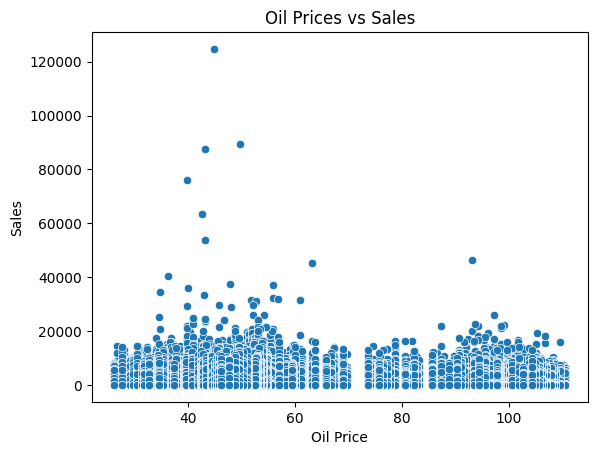

In [12]:
# Check Correlations Between Oil Prices & Sales
print("Checking correlations between oil prices and sales trends")
correlation = train[['sales', 'dcoilwtico']].corr()
print("Correlation between Sales and Oil Prices:")
print(correlation)
sns.scatterplot(x='dcoilwtico', y='sales', data=train)
plt.title('Oil Prices vs Sales')
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.show()

Identifying anomalies in the data.


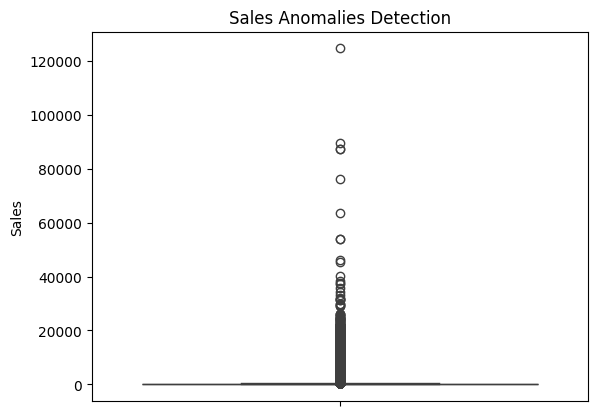

In [13]:
# Detect Anomalies in Sales Trends
print("Identifying anomalies in the data.")
sns.boxplot(y='sales', data=train)
plt.title('Sales Anomalies Detection')
plt.ylabel('Sales')
plt.show()

In [14]:
# Save processed dataset
train.to_csv('processed_train.csv', index=False)

print("Data processing and feature engineering completed.")

Data processing and feature engineering completed.


# **4. Documentation**
- Clearly document each preprocessing step in a Jupyter Notebook.
- Explain why each feature was created and how it helps in forecasting.

# **📚 Sales Forecasting: Data Preprocessing and Feature Engineering**

# **🌊 1. Introduction**

- **Objective:** Build a predictive model for forecasting sales.

- **Dataset Overview:**

 - train.csv – Historical sales data.

 - test.csv – Data for future predictions.

 - stores.csv – Information about store locations.

 - oil.csv – Daily oil prices.

 - holidays_events.csv – Calendar of holidays and events.

## **1. Data Cleaning**
- Load the dataset using Pandas.
- Handle missing values in oil prices by filling gaps with interpolation.
- Convert date columns to proper datetime formats.
- Merge data from stores.csv, oil.csv, and holidays_events.csv into the main dataset.

# 📚 **Import Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- **NumPy:** Handles numerical computations.

- **Pandas:** Manages data frames and facilitates data manipulation.

- **Matplotlib & Seaborn:** Creates visualizations to explore trends and patterns.

## **A. Load Datasets**

In [ ]:
train = pd.read_csv('train.csv', parse_dates=['date'])
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv', parse_dates=['date'])
holidays_events = pd.read_csv('holidays_events.csv', parse_dates=['date'])

### **Why?**

- **parse_dates** ensures that the date column is treated as a datetime object for easier time-based operations.

## **B. Handle Missing Values in Oil Prices**

In [ ]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='linear')

### **Reason:**

- Missing oil prices are filled using linear interpolation, ensuring no gaps in data that may affect trend-based analysis.

## **C. Merge Datasets**

In [ ]:
train = train.merge(stores, on='store_nbr', how='left')
train = train.merge(oil, on='date', how='left')
train = train.merge(holidays_events, on='date', how='left')

### **Why?**

- Merging enriches the training data by adding store information, oil prices, and holiday data, which might influence sales trends

## **D. Convert date columns to proper datetime formats**

In [ ]:
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

### **Why?**

- Ensures date columns are treated as datetime objects, facilitating feature extraction and time-based operations.

## **2. Feature Engineering**

- **Time-based Features:**
  - Extract day, week, month, year, and day of the week.
  - Identify seasonal trends (e.g., are sales higher in December?).
   
- **Event-based Features:**
  - Create binary flags for holidays, promotions, and economic events.
  - Identify if a day is a government payday (15th and last day of the month).
  - Consider earthquake impact (April 16, 2016) as a separate feature.
    
- **Rolling Statistics:**
  - Compute moving averages and rolling standard deviations for past sales.
  - Include lagged features (e.g., sales from the previous week, previous month).

- **Store-Specific Aggregations:**
  - Compute average sales per store type.
  - Identify top-selling product families per cluster.  

## **A. Date-Based Features**

In [ ]:
train['day'] = train['date'].dt.day
train['week'] = train['date'].dt.isocalendar().week
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['day_of_week'] = train['date'].dt.dayofweek

### **Why?**

- Time-based features allow the model to capture seasonality and periodicity in the data.

##  **B. Holiday & Event Features**

In [ ]:
train['is_holiday'] = train['type_y'].notna().astype(int)
train['is_weekend'] = (train['day_of_week'] >= 5).astype(int)
train['is_gov_payday'] = train.apply(lambda row: int(row['day'] in [15, row['date'].days_in_month]), axis=1)
train['earthquake_impact'] = (train['date'] == '2016-04-16').astype(int)

### **Why?**

- Holidays and weekends typically impact sales.

- Government paydays (15th and last day of the month) may cause a spike in sales.

- The earthquake on April 16, 2016, may have affected sales trends.

## **C. Rolling Statistics & Lag Features**

In [ ]:
train['sales_lag_7'] = train.groupby(['store_nbr', 'family'])['sales'].shift(7)
train['sales_lag_30'] = train.groupby(['store_nbr', 'family'])['sales'].shift(30)
train['rolling_mean_7'] = train.groupby(['store_nbr', 'family'])['sales'].rolling(7).mean().reset_index(level=[0,1], drop=True)
train['rolling_std_7'] = train.groupby(['store_nbr', 'family'])['sales'].rolling(7).std().reset_index(level=[0,1], drop=True)

### **Why?**

- Lag and rolling features help capture trends and seasonality, which are essential for time-series forecasting.

## **D. Store-Specific Aggregations**

In [ ]:
store_avg_sales = train.groupby('store_nbr')['sales'].mean().rename('avg_store_sales')
train = train.merge(store_avg_sales, on='store_nbr', how='left')

### **Why?**

- Store-level average sales help the model understand baseline sales for each store.

# **3. Exploratory Data Analysis (EDA)**

## **A. Sales Trends Over Time**

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=train, label='Sales Trend')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### **Purpose:**

- Visualize overall sales patterns over time.
- Identifies long-term sales trends.

- Helps in detecting seasonality or periodic patterns

## **B. Analyze Pre/Post-Holiday and Promotion Sales**

In [ ]:
holiday_sales = train.groupby(['date', 'is_holiday'])['sales'].mean().reset_index()
sns.boxplot(x='is_holiday', y='sales', data=holiday_sales)
plt.title('Sales Before and After Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Sales')
plt.show()

**Purpose:**

- Analyze how holidays influence sales.
- Useful for adding holiday-related features in forecasting models.

## **C. Check Correlations Between Oil Prices & Sales**

In [ ]:
correlation = train[['sales', 'dcoilwtico']].corr()
print("Correlation between Sales and Oil Prices:")
print(correlation)
sns.scatterplot(x='dcoilwtico', y='sales', data=train)
plt.title('Oil Prices vs Sales')
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.show()

### **Purpose:**

- Check if oil price fluctuations impact sales.
- Helps in deciding whether to include oil prices as a predictor in forecasting models.

## **D. Detect Anomalies in Sales Trends**

In [ ]:
sns.boxplot(y='sales', data=train)
plt.title('Sales Anomalies Detection')
plt.ylabel('Sales')
plt.show()

### **Purpose:**

- Identify any potential outliers in sales data.
- Helps decide if outliers need to be treated before modeling

# **💾  Save Processed Dataset**

In [ ]:
train.to_csv('processed_train.csv', index=False)
print("Data processing and feature engineering completed.")

### **Why?**

- The processed data is saved for further modeling and analysis.

# **Conclusion**

**Summary:**

 - Merged relevant datasets.

 - Handled missing values.

 - Created meaningful features to improve model accuracy.

 - Conducted EDA to understand data patterns.